In [1]:
# !pip install tensorflow==1.12.0
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical 
import os
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


# from __future__ import absolute_import, division, print_function, unicode_literals

# !pip install -q tensorflow==2.0.0-alpha0


from tensorflow.keras import layers, models
#!pip install tens

import pathlib


In [2]:
tf.VERSION

'1.13.1'

In [3]:
tf.enable_eager_execution()
# tf.executing_eagerly()

In [4]:
tf.COMPILER_VERSION


'MSVC 190024215'

In [12]:

Dataset = pathlib.Path('C:\\Users\\chanc\\MLearning\\WHERESWALDO1\\whereswaldo\\Blackwhite')
# Dataset = pathlib.Path('./dataset/nocir')
print(Dataset)

C:\Users\chanc\MLearning\WHERESWALDO1\whereswaldo\Blackwhite


In [13]:
for item in Dataset.iterdir():
    print(item)

C:\Users\chanc\MLearning\WHERESWALDO1\whereswaldo\Blackwhite\notwaldo
C:\Users\chanc\MLearning\WHERESWALDO1\whereswaldo\Blackwhite\waldo


In [15]:
import random 
all_image_paths = list(Directory.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]
random.shuffle(all_image_paths)

image_count = len(all_image_paths)
print(image_count)

6742


In [17]:
all_image_paths[:5]

['C:\\Users\\chanc\\MLearning\\WHERESWALDO1\\whereswaldo\\Blackwhite\\notwaldo\\bwwaldo2114859.jpg',
 'C:\\Users\\chanc\\MLearning\\WHERESWALDO1\\whereswaldo\\Blackwhite\\notwaldo\\bwwaldo231144.jpg',
 'C:\\Users\\chanc\\MLearning\\WHERESWALDO1\\whereswaldo\\Blackwhite\\notwaldo\\bwwaldo2111542.jpg',
 'C:\\Users\\chanc\\MLearning\\WHERESWALDO1\\whereswaldo\\Blackwhite\\notwaldo\\bwwaldo23232.jpg',
 'C:\\Users\\chanc\\MLearning\\WHERESWALDO1\\whereswaldo\\Blackwhite\\notwaldo\\bwwaldo2114676.jpg']

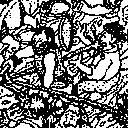

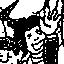

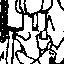

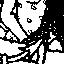

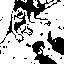

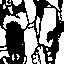

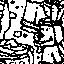

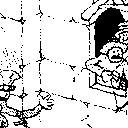

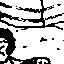

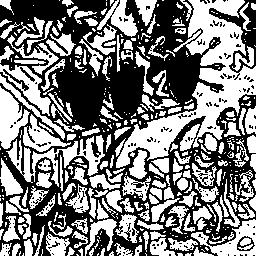

In [18]:
import IPython.display as display

for n in range (10):
    image_path = random.choice(all_image_paths)
    display.display(display.Image(image_path))
    print()

In [19]:

label_names = sorted(item.name for item in Dataset.glob('*/') if item.is_dir())
label_names

['notwaldo', 'waldo']

In [20]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'notwaldo': 0, 'waldo': 1}

In [21]:
all_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                   for path in all_image_paths]
print("First 10 labels indices: ", all_image_labels[:10])

First 10 labels indices:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [22]:
# load and format the images

In [23]:
img_path = all_image_paths[0]
img_path

'C:\\Users\\chanc\\MLearning\\WHERESWALDO1\\whereswaldo\\Blackwhite\\notwaldo\\bwwaldo2114859.jpg'

In [24]:
# the raw data

In [25]:
img_raw = tf.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: id=1, shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x...


In [26]:
# decode it into a image tensor:

In [27]:
img_tensor = tf.image.decode_image(img_raw)


print(img_tensor.shape)
print(img_tensor.dtype)
# img_tensor = tf.image.decode_image(img_raw)

# print(img_tensor.shape)
# print(img_tensor.dtype)

(64, 64, 3)
<dtype: 'uint8'>


In [28]:
# Resizing the model

In [31]:
img_final = tf.image.resize_images(img_tensor, [256,256])
img_final = img_final/255

print(img_final.shape)
print(img_final.numpy().min())
print(img_final.numpy().max())

(256, 256, 3)
0.0
1.0


In [34]:
def preprocess_image(image):
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.resize_images(image, [256,256])
    image /=255 # normalize to [0,1] range
    
    return image

In [35]:
# taking the imagine and running it through the funciton then returning the preprocessing_image

In [36]:
def load_and_preprocess_image(path):
    image = tf.read_file(path)
    return preprocess_image(image)

(256, 256)



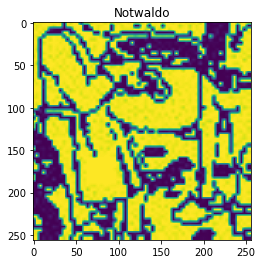

In [37]:
import matplotlib.pyplot as plt

imge_path = all_image_paths[0]
label = all_image_labels[0]
A = np.squeeze(load_and_preprocess_image(img_path))
print(A.shape)
plt.imshow(np.squeeze(load_and_preprocess_image(img_path)))
plt.grid(False)
#plt.xlabel(caption_image(img_path))
plt.title(label_names[label].title())
print()

In [38]:
# build a tf.Data.Dataset
# Here I am setting the DF
REPEAT_DATA = 111
# Creating a DataFrame for training that contains 70% of the Data
train_size = int(.7 * image_count)
# Creating a DataFrame for Validation that contains 20% of the Data
val_size = int(.20 * image_count)
# Creating a Dataframe for testing that contains 10% of the Data
test_size = int(.10 * image_count)

In [39]:
path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)

In [40]:
# the output shopes and output types fields describe the contect of each iteam in the dataset

print('shape:', repr(path_ds.output_shapes))
print('type:', path_ds.output_types)
print()
print(path_ds)

shape: TensorShape([])
type: <dtype: 'string'>

<DatasetV1Adapter shapes: (), types: tf.string>


In [41]:
AUTOTUNE = tf.contrib.data.AUTOTUNE


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [42]:
# create a new dataset that loads and formats images on the fly by mapping Preprocessing_image over the dataset paths
image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)

Instructions for updating:
Colocations handled automatically by placer.
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)


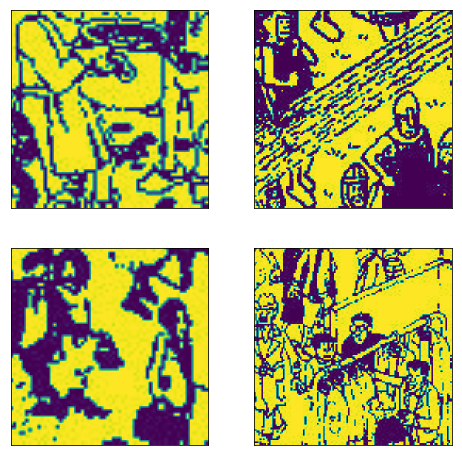

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
for n, image in enumerate(image_ds.take(4)):
    print(image.shape)
    plt.subplot(2,2, n+1)
    plt.imshow(np.squeeze((image)))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  #  plt.xlabel(caption_image(all_image_paths[n]))

In [44]:
label_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_image_labels, tf.int64))
print('shape', repr(label_ds.output_types))
print('type', label_ds.output_types)
print()
print(label_ds)

shape tf.int64
type <dtype: 'int64'>

<DatasetV1Adapter shapes: (), types: tf.int64>


In [45]:
image_label_ds = tf.data.Dataset.zip((image_ds, label_ds))
print('image shape:', image_label_ds.output_shapes[0])
print('label shape:', image_label_ds.output_shapes[1])
print('types:', image_label_ds.output_types)
print()
print(image_label_ds)

image shape: (256, 256, 1)
label shape: ()
types: (tf.float32, tf.int64)

<DatasetV1Adapter shapes: ((256, 256, 1), ()), types: (tf.float32, tf.int64)>


In [46]:
ds = tf.data.Dataset.from_tensor_slices((all_image_paths, all_image_labels))

# the tuples are unpacked into the positional argument of the mapped function
def load_and_preprocess_from_label(path, label):
    return load_and_preprocess_image(path), label

image_label_ds = ds.map(load_and_preprocess_from_label)
image_label_ds


<DatasetV1Adapter shapes: ((256, 256, 1), ()), types: (tf.float32, tf.int32)>

In [47]:
BATCH_SIZE = 32

# SETTING A SHUFFLE BUFFER SIZE AS LARGE AS THE DATASET ENSURE THAT THE DATA IS 
ds = image_label_ds.shuffle(buffer_size=image_count)
ds = ds.repeat()
ds = ds.batch(BATCH_SIZE)
# prefetch lets the dataset fetch batches
ds = ds.prefetch(buffer_size=AUTOTUNE)
ds

<DatasetV1Adapter shapes: ((?, 256, 256, 1), (?,)), types: (tf.float32, tf.int32)>

In [48]:
ds = image_label_ds.apply(
    tf.data.experimental.shuffle_and_repeat(buffer_size=image_count))
ds = ds.batch(BATCH_SIZE)
ds = ds.prefetch(buffer_size=AUTOTUNE)

In [49]:
train_data = ds.take(train_size)
test_data = ds.skip(train_size)
val_data = ds.skip(val_size)
test_data = ds.take(test_size)


# tf.data.make_one_shot_iterator(dataset)

train_data = train_data.repeat(REPEAT_DATA)
# train_data = train_data.batch(128)
train_data = train_data.shuffle(buffer_size=3)
next_itemTrain = train_data.make_one_shot_iterator

test_data = test_data.repeat(REPEAT_DATA)
# test_data = test_data.batch(128)
test_data = test_data.shuffle(buffer_size=3)
next_itemTest = test_data.make_one_shot_iterator


val_data = val_data.repeat(REPEAT_DATA)
# val_data = val_data.batch(32)
val_data = val_data.shuffle(buffer_size=3)
next_itemVal = test_data.make_one_shot_iterator
                                

In [59]:
model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape = (256,256,1)))
# model.add(Activation("softmax"))
# model.add(MaxPooling2D(pool_size(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Dense(64))




model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(optimizer=tf.train.AdamOptimizer(0.001),
    loss="categorical_crossentropy",
    metrics=['accuracy'])

# model.fit(x, y, batch_size=32, epochs=10, validation_split=1.0)
print(path_ds)

<DatasetV1Adapter shapes: (), types: tf.string>


In [60]:
train_data

<DatasetV1Adapter shapes: ((?, 256, 256, 1), (?,)), types: (tf.float32, tf.int32)>

In [ ]:
# model.fit(train_data, epochs=5, steps_per_epoch=31)
model.fit(train_data, epochs=5, steps_per_epoch=32, batch_size=32,validation_data=val_data, validation_steps=5)

Epoch 1/5
Instructions for updating:
Use tf.cast instead.
 3/32 [=>............................] - ETA: 21:52 - loss: 0.0144 - acc: 0.7812